In [19]:
import os
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%run ../../helper/preprocess.py
%run ../../helper/aggregate.py
%run ../../helper/utils.py
%run xy_plot.py

matplotlib.rcParams['pdf.fonttype'] = 42
sns.set(style="white", font_scale=1.8)
figsize = (24, 6)
figsize_large = (24, 12)
bbox_to_anchor = (0.5, -0.1)

In [2]:
metric_types = ['Image Similarity', 'Squared Centroid Distance', 'Text Similarity', 'Vendi', 'Style Loss']
encoders = ['DINOv2', 'DINOv2', 'CLIP', 'DINOv2', 'Vgg19']
modes = ['padding']
prompt_types = ['in', 'trigger', 'out']

metrics_to_include = get_metric_list(metric_types, encoders, modes,
                                     prompt_types, style_with_base_model=True)
display(metrics_to_include)

[('Image Similarity', 'DINOv2-padding', 'in'),
 ('Image Similarity', 'DINOv2-padding', 'trigger'),
 ('Image Similarity', 'DINOv2-padding', 'out'),
 ('Squared Centroid Distance', 'DINOv2-padding', 'in'),
 ('Squared Centroid Distance', 'DINOv2-padding', 'trigger'),
 ('Squared Centroid Distance', 'DINOv2-padding', 'out'),
 ('Text Similarity', 'CLIP', 'in'),
 ('Text Similarity', 'CLIP', 'trigger'),
 ('Text Similarity', 'CLIP', 'out'),
 ('Vendi', 'DINOv2', 'in'),
 ('Vendi', 'DINOv2', 'trigger'),
 ('Vendi', 'DINOv2', 'out'),
 ('Style Loss', 'Vgg19', 'in'),
 ('Style Loss', 'Vgg19', 'trigger'),
 ('Style Loss', 'Vgg19', 'out'),
 ('Style Loss', 'Vgg19', 'base model')]

In [16]:
metrics_to_plot = [(('Text Similarity', 'CLIP', 'out'),
                    ('Image Similarity', 'DINOv2-padding', 'out')),
                   (('Vendi', 'DINOv2', 'trigger'),
                    ('Squared Centroid Distance', 'DINOv2-padding',
                     'trigger')),
                   (('Style Loss', 'Vgg19', 'base model'),
                    ('Image Similarity', 'DINOv2-padding', 'in'))]

# Captions

In [3]:
metrics_file = '../../metrics/captions_metrics.csv'
config_file = '../../../exp_configs/config_mapping.csv'

keywords_to_exclude = []

metrics_processed = load_and_preprocess_metrics(
    metrics_file,
    config_file,
    metrics_to_include=metrics_to_include,
    keywords_to_exclude=keywords_to_exclude)

In [4]:
metrics_processed

Config  Algo    Preset        Lr  \
Architecture                                                              
Condition                                                                 
0                        exp-1021-sd15-lokrf8  lokr  attn-mlp  0.000500   
1                        exp-1021-sd15-lokrf8  lokr  attn-mlp  0.000500   
2                        exp-1021-sd15-lokrf8  lokr  attn-mlp  0.000500   
3                        exp-1021-sd15-lokrf8  lokr  attn-mlp  0.000500   
4                        exp-1021-sd15-lokrf8  lokr  attn-mlp  0.000500   
...                                       ...   ...       ...       ...   
4207          exp-3034-sd15-nt-lr5e-6-alltags  full  attn-mlp  0.000005   
4208          exp-3034-sd15-nt-lr5e-6-alltags  full  attn-mlp  0.000005   
4209          exp-3034-sd15-nt-lr5e-6-alltags  full  attn-mlp  0.000005   
4210          exp-3034-sd15-nt-lr5e-6-alltags  full  attn-mlp  0.000005   
4211          exp-3034-sd15-nt-lr5e-6-alltags  full  attn-mlp  0.000005   

                  Dim Alpha Factor   Caption Seed Step  ... Style Loss      \
Architecture                                            ...      Vgg19       
Condition                                               ... base model  in   
0             10000.0   1.0    8.0      .txt    a   30  ...   0.672897 NaN   
1             10000.0   1.0    8.0      .txt    a   30  ...   0.551402 NaN   
2             10000.0   1.0    8.0      .txt    a   30  ...   0.579439 NaN   
3             10000.0   1.0    8.0      .txt    a   30  ...   0.700935 NaN   
4             10000.0   1.0    8.0      .txt    a   30  ...   0.467290 NaN   
...               ...   ...    ...       ...  ...  ...  ...        ...  ..   
4207              NaN   NaN    NaN  .txttags    a   50  ...        NaN NaN   
4208              NaN   NaN    NaN  .txttags    a   50  ...        NaN NaN   
4209              NaN   NaN    NaN  .txttags    a   50  ...        NaN NaN   
4210              NaN   NaN    NaN  .txttags    a   50  ...        NaN NaN   
4211              NaN   NaN    NaN  .txttags    a   50  ...        NaN NaN   

                         Text Similarity                         Vendi  \
Architecture                        CLIP                        DINOv2   
Condition    out trigger              in       out   trigger        in   
0            NaN     NaN        0.915888  0.728972  0.943925  0.112150   
1            NaN     NaN        0.598131  0.532710  0.775701  0.168224   
2            NaN     NaN        0.775701  0.719626  0.990654  0.532710   
3            NaN     NaN        0.588785  0.579439  0.336449  0.140187   
4            NaN     NaN        0.953271  0.504673  0.878505  0.644860   
...           ..     ...             ...       ...       ...       ...   
4207         NaN     NaN        0.738318  0.813084  0.962617  0.775701   
4208         NaN     NaN        0.448598  0.719626  0.168224  0.887850   
4209         NaN     NaN        0.775701  0.476636  0.934579  0.644860   
4210         NaN     NaN        0.822430  0.579439  0.887850  0.887850   
4211         NaN     NaN        0.644860  0.401869  0.439252  0.925234   

                                  
Architecture                      
Condition          out   trigger  
0             0.205607  0.028037  
1             0.897196  0.000000  
2             0.523364  0.018692  
3             0.570093  0.971963  
4             0.485981  0.355140  
...                ...       ...  
4207          0.355140  0.411215  
4208          0.401869  0.149533  
4209          0.616822  0.252336  
4210          0.355140  0.831776  
4211          0.448598  0.654206  

[4212 rows x 29 columns]

In [25]:
%run xy_plot.py

In [6]:
category = 'people'

extra_conodition = {
    'Category': category,
}

save_dir = f'figures/add/{category}/'
# os.makedirs(save_dir, exist_ok=True)

In [20]:
metrics_aggregated = filter_config_and_aggregate(
    metrics_processed, ['Caption'],
    extra_conodition,
    default_keywords=['1001', '1011', '1021', '1034'])

In [21]:
metrics_aggregated

Config  Algo    Preset        Lr  \
Architecture                                                              
Condition                                                                 
Statistics                                                                
0                       exp-1001-sd15-lora8a4  lora  attn-mlp  0.000500   
1                       exp-1001-sd15-lora8a4  lora  attn-mlp  0.000500   
2                       exp-1001-sd15-lora8a4  lora  attn-mlp  0.000500   
3                       exp-1011-sd15-loha4a2  loha  attn-mlp  0.000500   
4                       exp-1011-sd15-loha4a2  loha  attn-mlp  0.000500   
5                       exp-1011-sd15-loha4a2  loha  attn-mlp  0.000500   
6                        exp-1021-sd15-lokrf8  lokr  attn-mlp  0.000500   
7                        exp-1021-sd15-lokrf8  lokr  attn-mlp  0.000500   
8                        exp-1021-sd15-lokrf8  lokr  attn-mlp  0.000500   
9                     exp-1034-sd15-nt-lr5e-6  full  attn-mlp  0.000005   
10                    exp-1034-sd15-nt-lr5e-6  full  attn-mlp  0.000005   
11                    exp-1034-sd15-nt-lr5e-6  full  attn-mlp  0.000005   
12                   exp-2001-sd15-lora8a4-db  lora  attn-mlp  0.000500   
13                   exp-2001-sd15-lora8a4-db  lora  attn-mlp  0.000500   
14                   exp-2001-sd15-lora8a4-db  lora  attn-mlp  0.000500   
15                   exp-2021-sd15-loha4a2-db  loha  attn-mlp  0.000500   
16                   exp-2021-sd15-loha4a2-db  loha  attn-mlp  0.000500   
17                   exp-2021-sd15-loha4a2-db  loha  attn-mlp  0.000500   
18                    exp-2031-sd15-lokrf8-db  lokr  attn-mlp  0.000500   
19                    exp-2031-sd15-lokrf8-db  lokr  attn-mlp  0.000500   
20                    exp-2031-sd15-lokrf8-db  lokr  attn-mlp  0.000500   
21                 exp-2034-sd15-nt-lr5e-6-db  full  attn-mlp  0.000005   
22                 exp-2034-sd15-nt-lr5e-6-db  full  attn-mlp  0.000005   
23                 exp-2034-sd15-nt-lr5e-6-db  full  attn-mlp  0.000005   
24              exp-3001-sd15-lora8a4-alltags  lora  attn-mlp  0.000500   
25              exp-3001-sd15-lora8a4-alltags  lora  attn-mlp  0.000500   
26              exp-3001-sd15-lora8a4-alltags  lora  attn-mlp  0.000500   
27              exp-3011-sd15-loha4a2-alltags  loha  attn-mlp  0.000500   
28              exp-3011-sd15-loha4a2-alltags  loha  attn-mlp  0.000500   
29              exp-3011-sd15-loha4a2-alltags  loha  attn-mlp  0.000500   
30               exp-3021-sd15-lokrf8-alltags  lokr  attn-mlp  0.000500   
31               exp-3021-sd15-lokrf8-alltags  lokr  attn-mlp  0.000500   
32               exp-3021-sd15-lokrf8-alltags  lokr  attn-mlp  0.000500   
33            exp-3034-sd15-nt-lr5e-6-alltags  full  attn-mlp  0.000005   
34            exp-3034-sd15-nt-lr5e-6-alltags  full  attn-mlp  0.000005   
35            exp-3034-sd15-nt-lr5e-6-alltags  full  attn-mlp  0.000005   

                  Dim Alpha Factor   Caption Step Image Similarity  ...  \
Architecture                                        DINOv2-padding  ...   
Condition                                                       in  ...   
Statistics                                                    mean  ...   
0                 8.0   4.0    NaN      .txt   10         0.105140  ...   
1                 8.0   4.0    NaN      .txt   30         0.191745  ...   
2                 8.0   4.0    NaN      .txt   50         0.142471  ...   
3                 4.0   2.0    NaN      .txt   10         0.063967  ...   
4                 4.0   2.0    NaN      .txt   30         0.134995  ...   
5                 4.0   2.0    NaN      .txt   50         0.152388  ...   
6             10000.0   1.0    8.0      .txt   10         0.183853  ...   
7             10000.0   1.0    8.0      .txt   30         0.206698  ...   
8             10000.0   1.0    8.0      .txt   50         0.189408  ...   
9                 NaN   NaN    NaN      .txt   10         0.129

loha
.txt
2     False
5      True
8     False
11    False
14    False
17    False
20    False
23    False
26    False
29    False
32    False
35    False
dtype: bool
lora
.txttags
2     False
5     False
8     False
11    False
14    False
17    False
20    False
23    False
26     True
29    False
32    False
35    False
dtype: bool
full
.txttags
2     False
5     False
8     False
11    False
14    False
17    False
20    False
23    False
26    False
29    False
32    False
35     True
dtype: bool
lokr
.txttags
2     False
5     False
8     False
11    False
14    False
17    False
20    False
23    False
26    False
29    False
32     True
35    False
dtype: bool
loha
.txttags
2     False
5     False
8     False
11    False
14    False
17    False
20    False
23    False
26    False
29     True
32    False
35    False
dtype: bool
lora
.txtdb
2     False
5     False
8     False
11    False
14     True
17    False
20    False
23    False
26    False
29    False
32    False
35    Fals

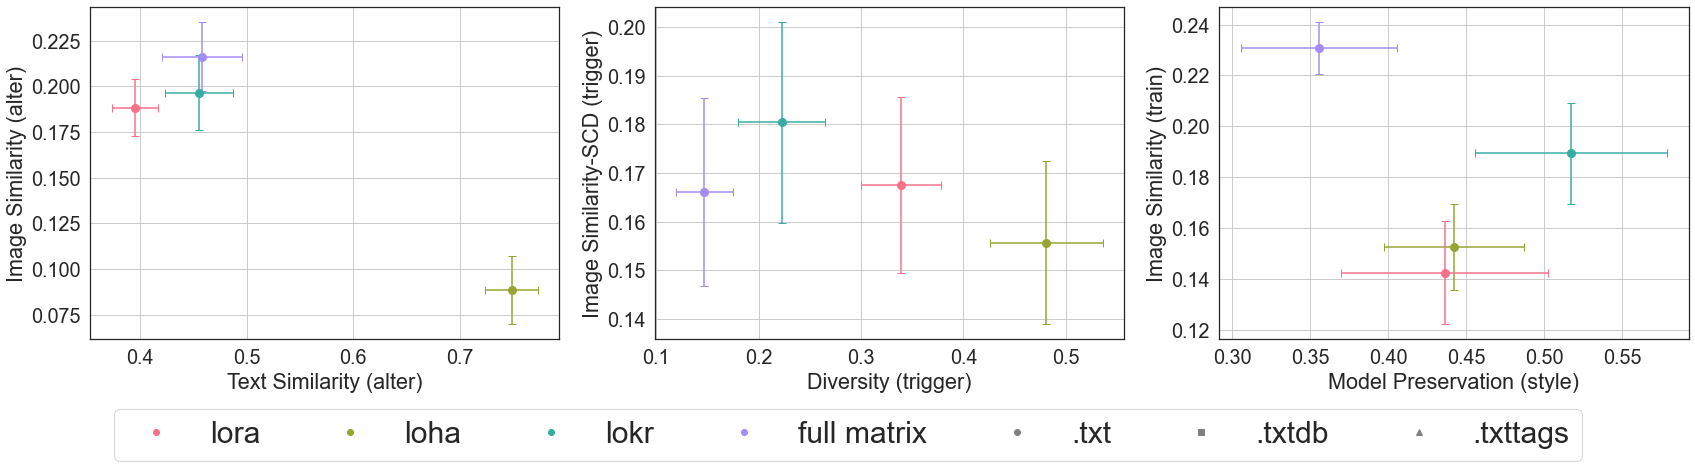

In [26]:
plt.figure(figsize=figsize)

for i, metric_pair in enumerate(metrics_to_plot):
    plt.subplot(1, 3, i + 1)
    legend_handles = plot_metrics_xy(metrics_aggregated,
                                     metric_pair[0],
                                     metric_pair[1],
                                     color_by='Algo',
                                     shape_by='Caption',
                                     legend=False,
                                     step=50)

fig = plt.gcf()

fig.legend(handles=legend_handles,
           loc='lower center',
           bbox_to_anchor=(0.5, -0.14),
           fontsize=30,
           ncol=len(legend_handles))
plt.tight_layout()
# Adjust the height of the space between subplots
fig.subplots_adjust(hspace=0.4)

## Preset

In [26]:
category = 'scene'

extra_conodition = {
    'Category': category,
}

save_dir = f'figures/main/{category}/'
os.makedirs(save_dir, exist_ok=True)

In [27]:
metrics_aggregated = filter_config_and_aggregate(metrics_processed, ['Preset'],
                                                 extra_conodition)

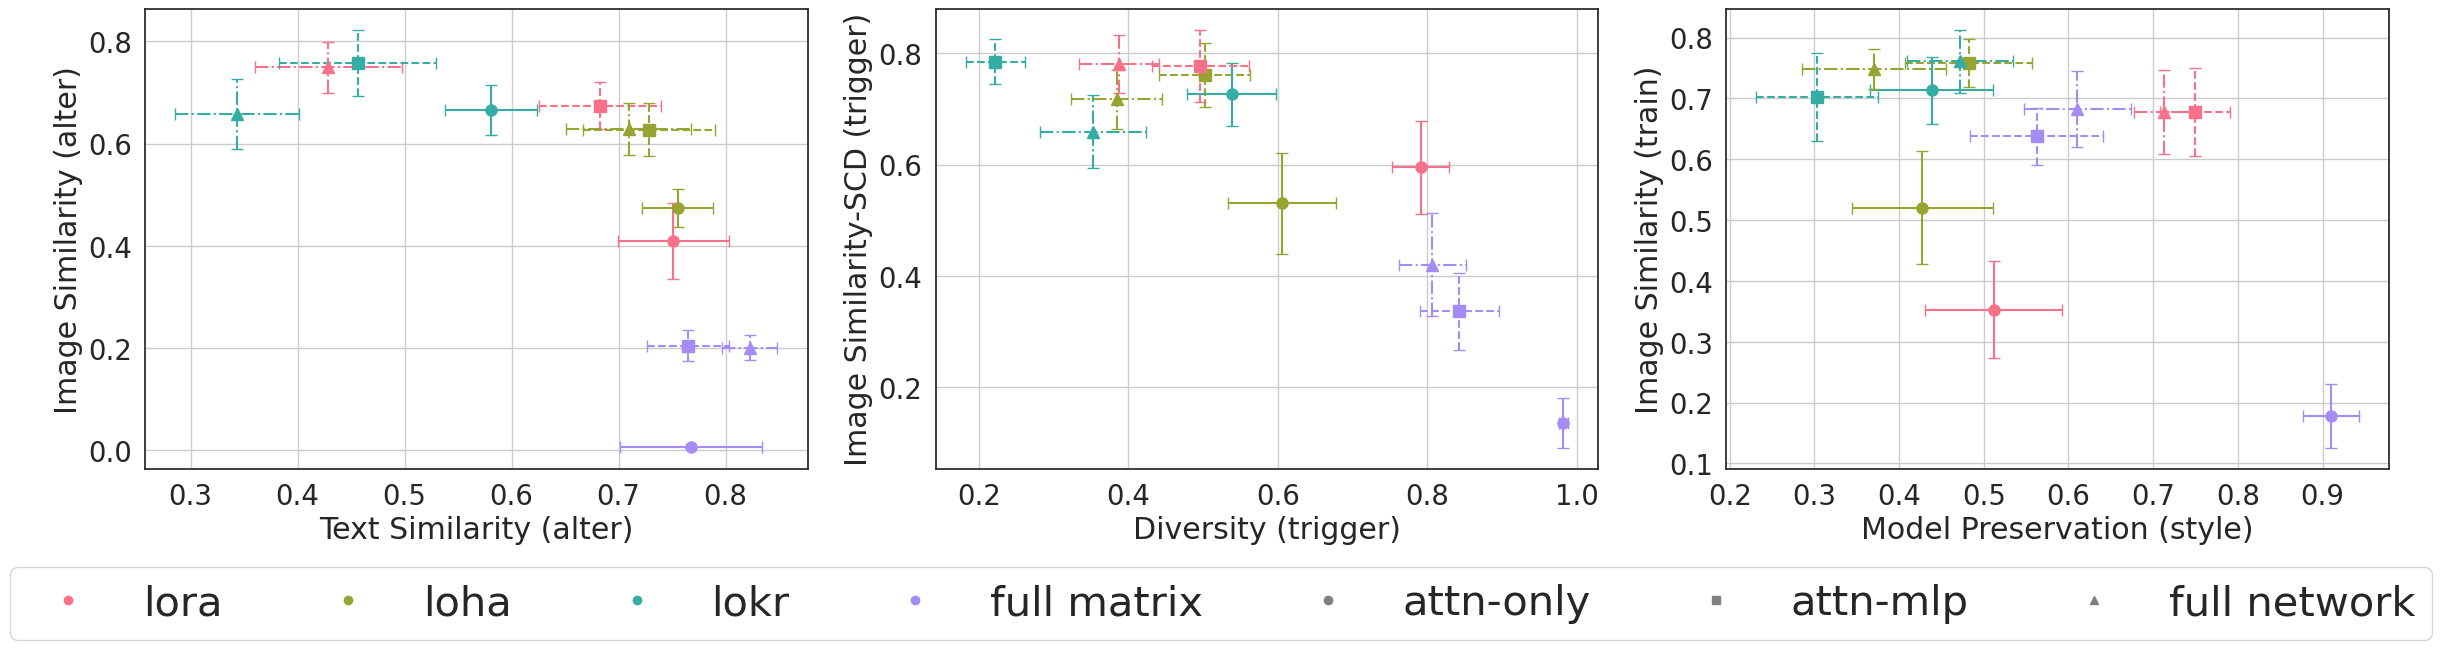

In [29]:
plt.figure(figsize=figsize)

for i, metric_pair in enumerate(metrics_to_plot):
    plt.subplot(1, 3, i + 1)
    legend_handles = plot_metrics_xy(metrics_aggregated,
                                     metric_pair[0],
                                     metric_pair[1],
                                     color_by='Algo',
                                     shape_by='Preset',
                                     legend=False,
                                     step=10)

fig = plt.gcf()

fig.legend(handles=legend_handles,
           loc='lower center',
           bbox_to_anchor=(0.5, -0.14),
           fontsize=30,
           ncol=len(legend_handles))
plt.tight_layout()
# Adjust the height of the space between subplots
fig.subplots_adjust(hspace=0.4)

for ext in ['.png', '.pdf']:
    plt.savefig(os.path.join(save_dir, f'preset_{category}_xyplot_step10' + ext),
                bbox_inches='tight',
                pad_inches=0.2)

In [31]:
metrics_aggregated = filter_config_and_aggregate(metrics_processed,
                                                 ['Dim', 'Factor'],
                                                 extra_conodition)
metrics_aggregated = transform_attributes(metrics_aggregated,
                                          multiindex=True,
                                          drop=False)
condition = (metrics_aggregated['Alpha']
             == 1) & (metrics_aggregated['Algo'].isin(['lora', 'loha']))
metrics_aggregated.loc[condition, 'Capacity'] = 4
metrics_aggregated = metrics_aggregated[metrics_aggregated['Algo'] != 'full']
shape_mapping = {
    1: 'factor=12',
    2: 'dim=4/8 | factor=8',
    3: 'dim=16/32 | factor=4',
    4: 'dim=16/32, alpha=1'
}

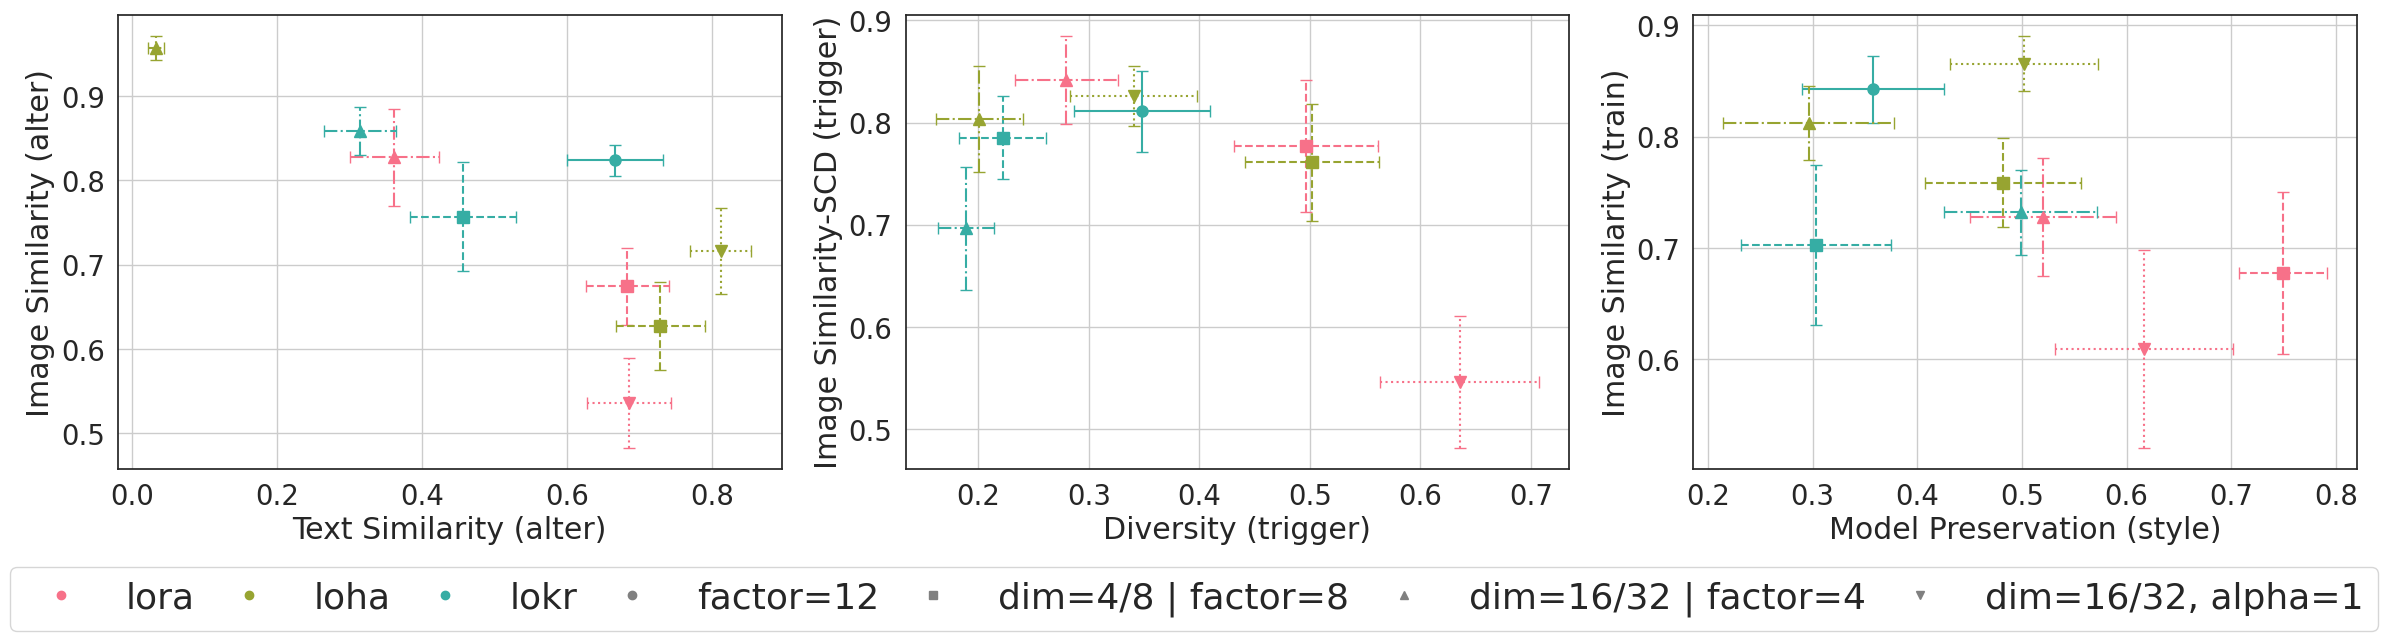

In [47]:
plt.figure(figsize=figsize)

for i, metric_pair in enumerate(metrics_to_plot):
    plt.subplot(1, 3, i + 1)
    legend_handles = plot_metrics_xy(metrics_aggregated,
                                     metric_pair[0],
                                     metric_pair[1],
                                     color_by='Algo',
                                     shape_by='Capacity',
                                     use_full=False,
                                     shape_mapping=shape_mapping,
                                     legend=False,
                                     step=10)
fig = plt.gcf()
fig.legend(handles=legend_handles,
           loc='lower center',
           bbox_to_anchor=(0.5, -0.12),
           fontsize=26,
           ncol=7,
           columnspacing=0.5)  # adjust this value as needed
plt.tight_layout()

for ext in ['.png', '.pdf']:
    plt.savefig(os.path.join(save_dir,
                             f'capacity_{category}_xyplot_step10' + ext),
                bbox_inches='tight',
                pad_inches=0.2)

## Lr

In [49]:
category = 'people'

extra_conodition = {
    'Category': category,
}

save_dir = f'figures/main/{category}/'
os.makedirs(save_dir, exist_ok=True)

In [50]:
metrics_aggregated = filter_config_and_aggregate(metrics_processed, ['Lr'],
                                                 extra_conodition)
metrics_aggregated = transform_attributes(metrics_aggregated,
                                          multiindex=True,
                                          drop=False)
shape_mapping = {
    1: 'lr=1e-4/5e-7',
    2: 'lr=5e-4/1e-6',
    3: 'lr=1e-3/5e-6',
}

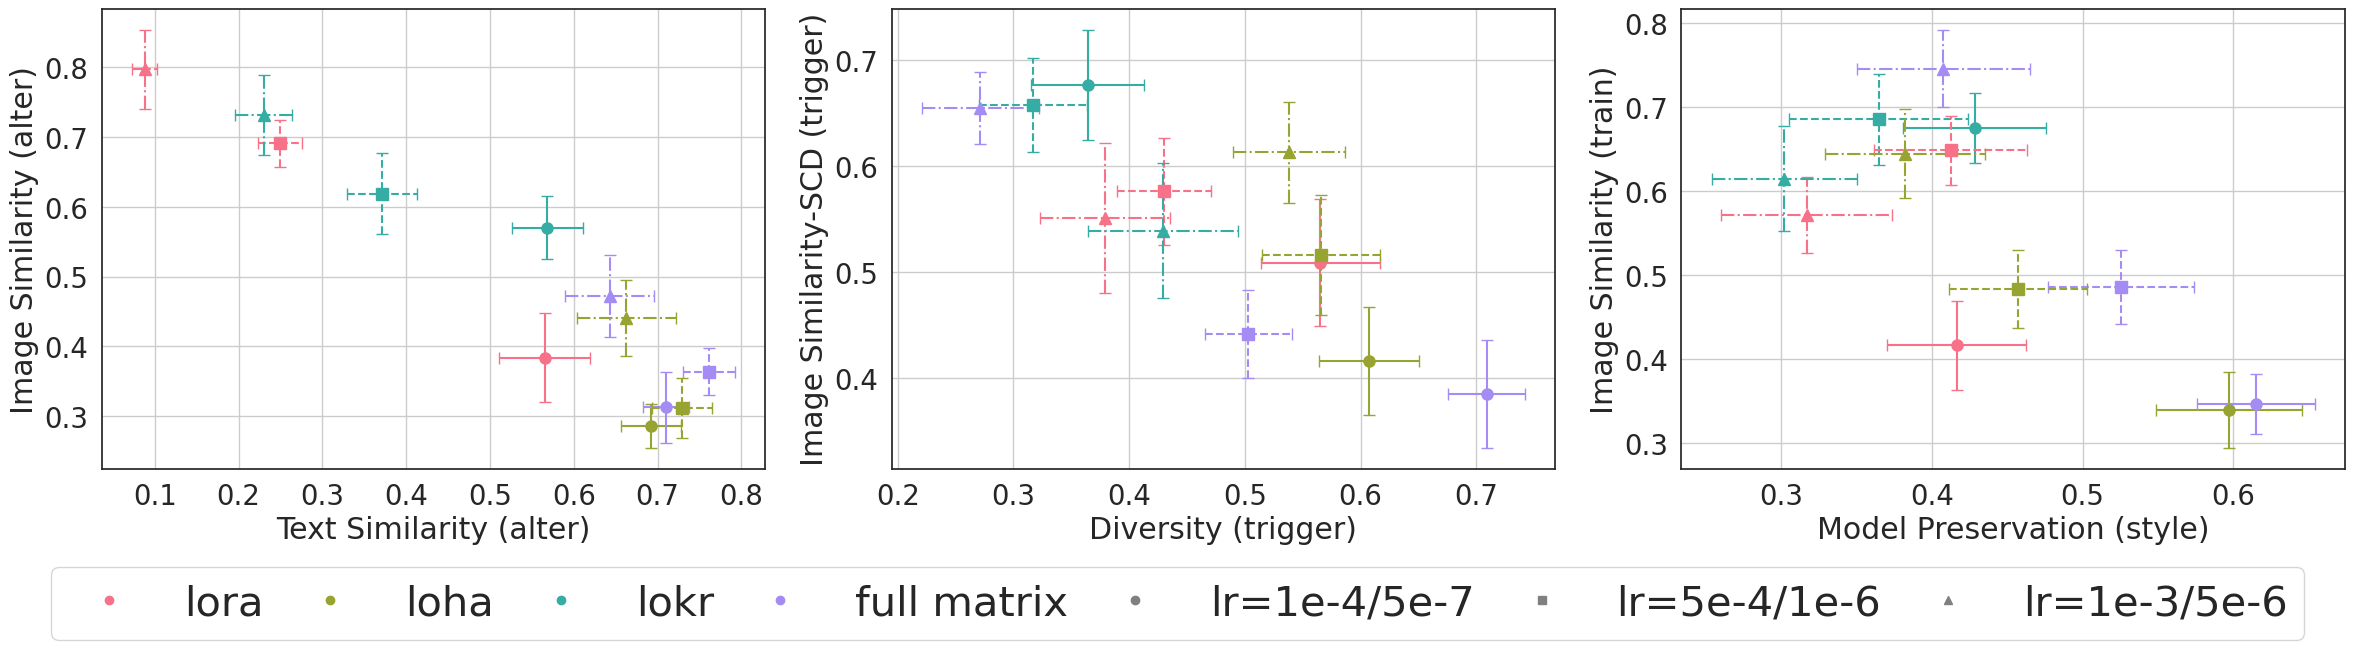

In [51]:
plt.figure(figsize=figsize)

for i, metric_pair in enumerate(metrics_to_plot):
    plt.subplot(1, 3, i + 1)
    legend_handles = plot_metrics_xy(metrics_aggregated,
                                     metric_pair[0],
                                     metric_pair[1],
                                     color_by='Algo',
                                     shape_by='Lr Level',
                                     shape_mapping=shape_mapping,
                                     legend=False,
                                     step=30)
fig = plt.gcf()
fig.legend(handles=legend_handles,
           loc='lower center',
           bbox_to_anchor=(0.5, -0.14),
           ncol=len(legend_handles),
           fontsize=30,
           columnspacing=0.6)  # adjust this value as needed
plt.tight_layout()

for ext in ['.png', '.pdf']:
    plt.savefig(os.path.join(save_dir, f'lr_{category}_xyplot_step30' + ext),
                bbox_inches='tight',
                pad_inches=0.2)